In [1]:
import sys
sys.path.append('/nfs/home/genovese/thesis-wildfire-genovese/pca_study/')
import utils
from importlib import reload
reload(utils)
from utils import *

In [2]:
X_train_val = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/X_train_val.csv')
X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/X_test.csv')

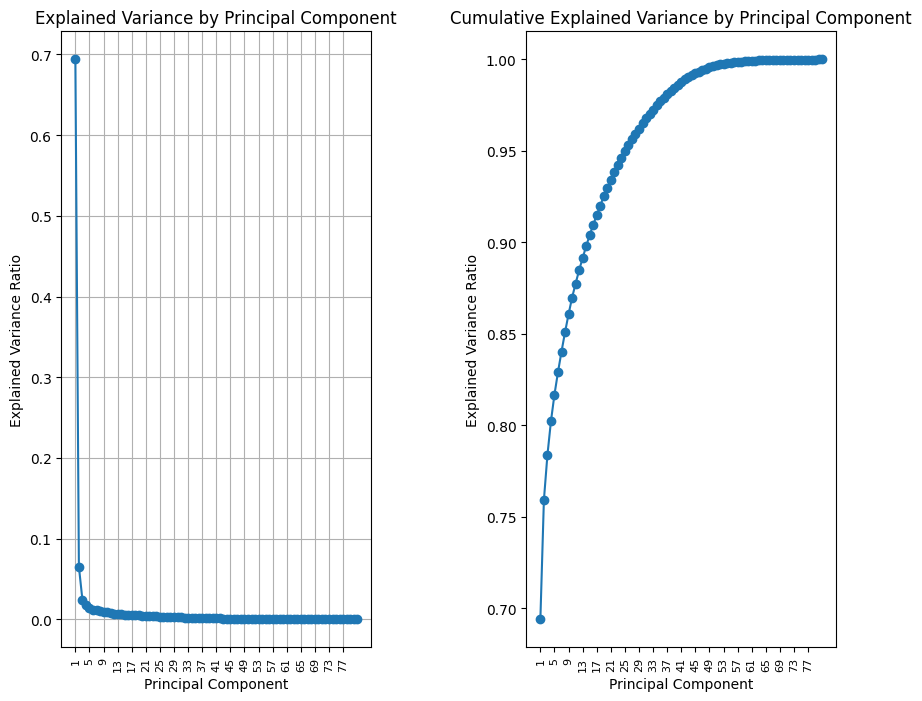

In [3]:
scaler, pca, pca_df = pca_with_results(X_train_val)

In [4]:
pc_to_select = 9 # as it was for the rfe output
selected_df = pca_df.loc[:, [f'PC{n}' for n in range(1, pc_to_select+1, 1)]]
print('Explained variance: ', np.sum(pca.explained_variance_ratio_[:pc_to_select+1]))

Explained variance:  0.8697521423219039


In [5]:
import pickle 
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/trained_models/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

selected_df.to_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/pca_X_train_val.csv', index=False)

transform_test_after_pca_selection(X_test, scaler, pca, pc_to_select, output_folder='/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_a/')

---